# 1. REGRESSION 

We are given the daily exchange rates over the last 20 years. We are trying to come up with an estimate
for the exchange rate on August 4th, 2021. Looking at the dataset, it seems that the changes in prices tend to be multiplicative rather than additive. As long as we stick to linear functions, the slope interaction terms would be better than fitting of a single function. 

Before starting with the model, we first import and prepare the dataset:

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Read the csv file
if os.path.exists("USDtoARS.csv"): 
    df = pd.read_csv("USDtoARS.csv")
    df.drop(df.columns[[2,4, 5,6,7,8,9,10,11,12,13,14,15]], axis = 1, inplace = True)

In [ ]:
# Prepare data
x = df['Days since 01/01/2000'].to_numpy()
y = df['Price'].to_numpy()

On a first look, our dependent variable is Price whereas the independent variable is Day. To further investigate the dataset, we visualize it in various methods.

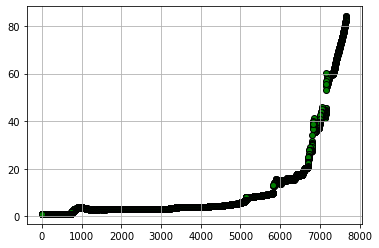

In [ ]:
plt.scatter(x, y, c = 'green', edgecolors='k')
plt.grid(True)
plt.show()

This plot visualizes the days passed since the starting point, 01/01/00 against the Price.

We can also check the distribution of the Price with histogram which represents the distribution of data. We group the values of all given Series in the DataFrame
into bins and draw all bins in one graph:

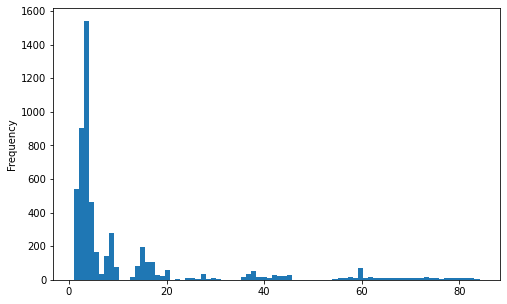

In [ ]:
df['Price'].plot.hist(bins=80, figsize=(8,5))

We can also generate Kernel Density Estimate plot using Gaussian kernels. This plot is non-parametric, and it helps us to estimate PDF of a random variable:

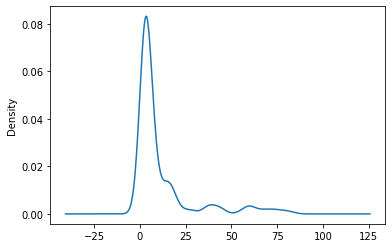

In [ ]:
df['Price'].plot.density()

Now, it's time to choose a model and make assumptions. In linear regression, we need to assume that the data is linear. However, the plots above show us that this is not the case here. Non-Linear regression, on the other hand, is a type of polynomial regression. It follows a non-linear relationship between the independent and the dependent variables. It's often used in places where the data follows a curvy trend, where linear regression would not be the best in terms of accuracy compared to a non-linear model.

Let's make assumptions and try out a linear model. 

The first assumption is linear relatioship : We assume that there exists a linear relationship between the independent variable X and dependent variable Y.

Second is independence : We count the residuals as independent.

Third is normality : We assume that the residuals of the model are normalliy distributed.

And finally, homoscedasticity : We count the residuals as having constant variance at every level of X. 

After splitting the data, we will prepare a training/testing environment and plot the linear regression model accordingly.

In [ ]:
#cut the years
x = x[: 280]
y = y[: 280]

Splitting the data from this point ensured high accuracy when we use the following method to calculate r squared. Taking more than the past year resulted in low accuracy due to high fluctuations, and though the best accuracy was achieved with past 94 days, we should take more data points into account rather than ignoring them so using 280 days was ideal with 0.99 accuracy:

In [ ]:
#Checking accuracy using r^2
r = np.corrcoef(x, y)[0][1]
r_sq = r * r
print (r_sq)

0.9904869607949262


This makes sense, because the initial plot had showed us that the last couple of hundred days clearly follow a linear trend. This is way different compared to the first years of the 00's. Hence, the old data is irrelevant.

Now we use sklearn's linear model functions, and pass in the dates and the prices from the last 280 days. Our model is called "regr", "y_pred" is the variable that holds predicted prices according to the predicted x values (days passed):

Coefficients: 
 [[0.06446746]]


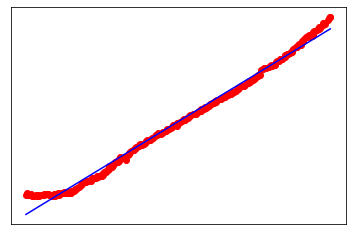

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#training and testing variables
x_train = x
y_train = y
x_test = x
y_test = y
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#linear regression model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

#predict
y_pred = regr.predict(x_test)

#coefficients
print('Coefficients: \n', regr.coef_)

#plot outputs
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

The plot makes sense, because r squared is not 1, therefore not a perfect fit, but close enough. The 280 days we chose close around the trend line well. Now, we use this model to predict an actual date that is not present in the dataset.

August 4th 2021 is 7886 days after the initial date. Putting 7886 as the x_predict will give us the Price, y_predict.

In [ ]:
x_predict = [[7886]]  
y_predict = regr.predict(x_predict)
print(y_predict)

[[96.40778627]]


This model predicted the Price to be 96.4 on the exact given date, using the past 280 days. 

Linear fit is sensitive to outliers and is often inadequate but higher-order polynomial fits often leads to overfitting. We could cut the dataset, as we did in the example, starting from the elbow point, and assume a linear trend; however, we would have to ignore a large amount of data that could improve the model. This means a non-linear regression could solve the previously mentioned problems. 

There are various reasons not to expect accurate forecasting results from this method:

1- Our model is solely developed due to records from the past. Past performance might not indicate future performance in every case. Therefore, the model based on historical data cannot always produce accurate predictions.

2 - Our model has been specifically based on the data of last 280 days. The the output might change over a period of time, it can be seen if the code is altered and the cut point is different. Therefore, the accuracy of predictions will change as we move down the line.

Considering these, we shouldn't expect to predict the exchange rate with full confidence. However, predictions like these always include uncertainty, and our model is good enough as an estimator for a specific given date. The important point is to be aware of the limitations of linear modeling.